In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2

In [3]:
root_dir = r"C:\Users\fortn\OneDrive\Desktop\ISL_Text_conv\processed_dataset"


In [4]:
categories = sorted(os.listdir(root_dir))
print(f"Categories: {categories}")

Categories: ['test', 'train', 'val']


In [5]:
# Dataset paths
dataset_path = r'C:\Users\fortn\OneDrive\Desktop\ISL_Text_conv\processed_dataset'
train_path = os.path.join(dataset_path, 'train')  # Ensure your data is organized into 'train' and 'val' folders
val_path = os.path.join(dataset_path, 'val')
test_path = os.path.join(dataset_path, 'test')
# Hyperparameters
IMG_HEIGHT, IMG_WIDTH = 64, 64
BATCH_SIZE = 32

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255, #normalizing pixels 
    rotation_range=20, #randomly rotates images by about 20 degrees
    width_shift_range=0.2, #randomly increases width by 20%
    height_shift_range=0.2, #randomly increases height by 20%
    zoom_range=0.2, #zooms in on images apparently 
    horizontal_flip= True,#randomly flips images 
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load datasets
train_generator = train_datagen.flow_from_directory( #loads from the directory 
    train_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Number of classes
# num_classes = len(train_generator.class_indices)
x_batch, y_batch = next(train_generator)
print(x_batch.shape)  # Should be (batch_size, IMG_HEIGHT, IMG_WIDTH, 3)
print(y_batch.shape)  # Should be (batch_size, num_classes)

Found 29888 images belonging to 35 classes.
Found 8550 images belonging to 35 classes.
(32, 64, 64, 3)
(32, 35)


In [6]:
base_model = MobileNetV2(input_shape=(64, 64, 3), include_top=False, weights='imagenet')
base_model.trainable =False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(35, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()


C:\Users\fortn\AppData\Local\Temp\ipykernel_11400\1512442018.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(64, 64, 3), include_top=False, weights='imagenet')


In [7]:

history=model.fit(
    train_generator,
        epochs=7,
        validation_data=val_generator
)


c:\Users\fortn\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
934/934 ━━━━━━━━━━━━━━━━━━━━ 145s 152ms/step - accuracy: 0.6739 - loss: 1.3098 - val_accuracy: 0.9687 - val_loss: 0.1003
Epoch 2/7
934/934 ━━━━━━━━━━━━━━━━━━━━ 147s 158ms/step - accuracy: 0.9553 - loss: 0.1666 - val_accuracy: 0.9708 - val_loss: 0.0871
Epoch 3/7
934/934 ━━━━━━━━━━━━━━━━━━━━ 146s 156ms/step - accuracy: 0.9692 - loss: 0.1073 - val_accuracy: 0.9773 - val_loss: 0.0653
Epoch 4/7
934/934 ━━━━━━━━━━━━━━━━━━━━ 149s 160ms/step - accuracy: 0.9770 - loss: 0.0814 - val_accuracy: 0.9744 - val_loss: 0.0739
Epoch 5/7
934/934 ━━━━━━━━━━━━━━━━━━━━ 149s 159ms/step - accuracy: 0.9799 - loss: 0.0657 - val_accuracy: 0.9657 - val_loss: 0.0925
Epoch 6/7
934/934 ━━━━━━━━━━━━━━━━━━━━ 130s 139ms/step - accuracy: 0.9822 - loss: 0.0597 - val_accuracy: 0.9827 - val_loss: 0.0507
Epoch 7/7
934/934 ━━━━━━━━━━━━━━━━━━━━ 164s 175ms/step - accuracy: 0.9849 - loss: 0.0531 - val_accuracy: 0.9836 - val_loss: 0.0484


In [8]:
# Test data generator
test_dir = os.path.join(dataset_path, "Test")
test_datagen = ImageDataGenerator(rescale=1.0/255)  

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Same as training/validation
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # Same as training/validation
)
loss, accuracy = model.evaluate(test_generator)

print("Test loss:", loss)
print("Test accuracy:", accuracy)


Found 4307 images belonging to 35 classes.
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9890 - loss: 0.0384
Test loss: 0.04850015044212341
Test accuracy: 0.9856048226356506


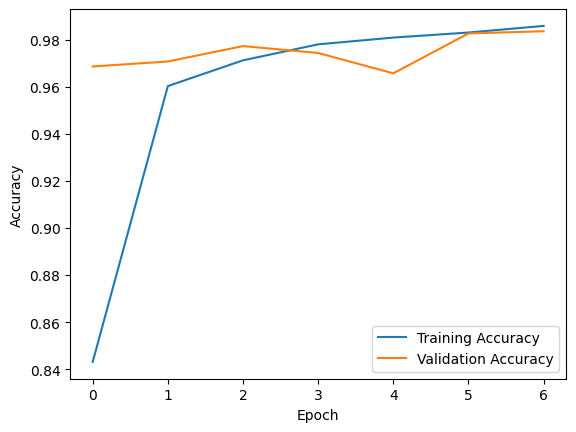

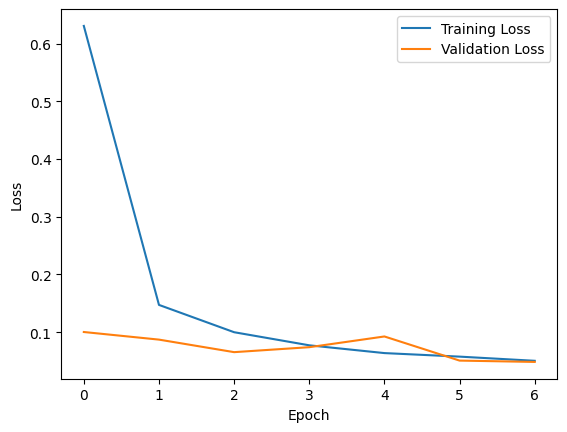

In [9]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
model.save('isl_final_model.keras')
